### Import the necessary libraries

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


### Load data

In [2]:
# Load the dataset
data = pd.read_csv('dataset.csv')
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Check for missing data

In [3]:
data.isna().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

### Check for duplicates

In [4]:
# Check for duplicates
duplicates = data.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")

Number of duplicates: 3


### Remove duplicates

In [5]:
# Remove duplicates
data_cleaned = data.drop_duplicates()

# Reset the index after removing duplicates
data_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
data_cleaned

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


### Check for class balance

Class
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64


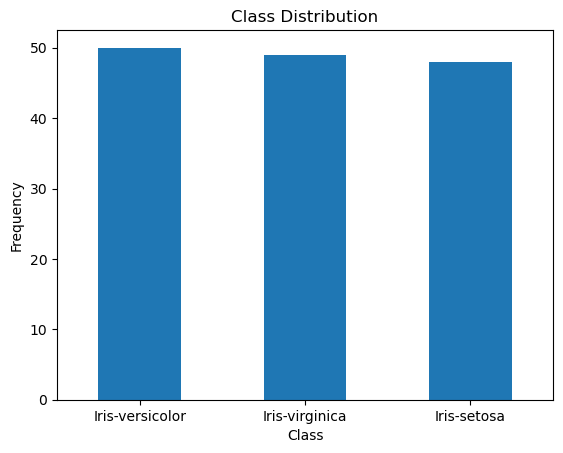

In [6]:
# Check the distribution of the target variable 'Class'
class_distribution = data_cleaned['Class'].value_counts()

# Display the class distribution
print(class_distribution)

# Plot the class distribution for better visualization
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

### Encoding categorical variables

In [7]:
# Encode the target variable
label_encoder = LabelEncoder()
data_cleaned['Class'] = label_encoder.fit_transform(data_cleaned['Class'])

C:\Users\asman\AppData\Local\Temp\ipykernel_22876\3533725444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Class'] = label_encoder.fit_transform(data_cleaned['Class'])


### Check for outliers

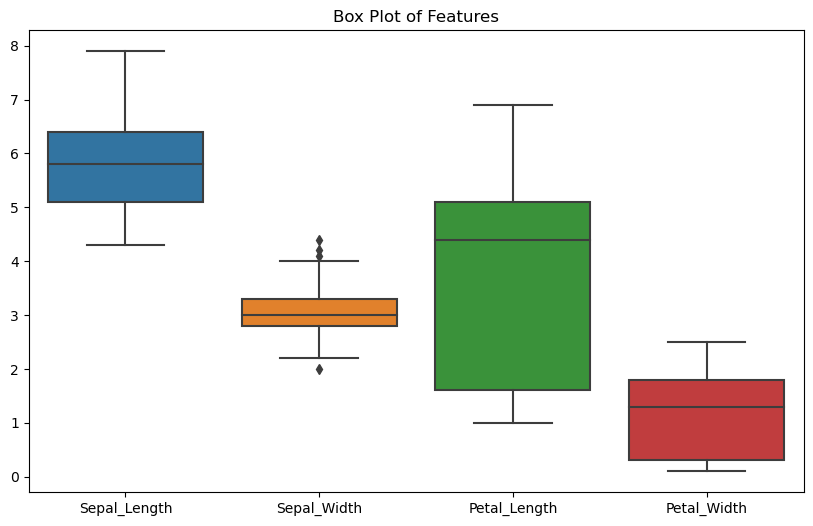

In [8]:
# Box plots to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned.drop('Class', axis=1))
plt.title('Box Plot of Features')
plt.show()

### Remove outliers based on the Interquartile Range (IQR) method.

In [9]:
# Define a function to remove outliers based on IQR
def remove_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function
data_cleaned_no_outliers = remove_outliers(data_cleaned)

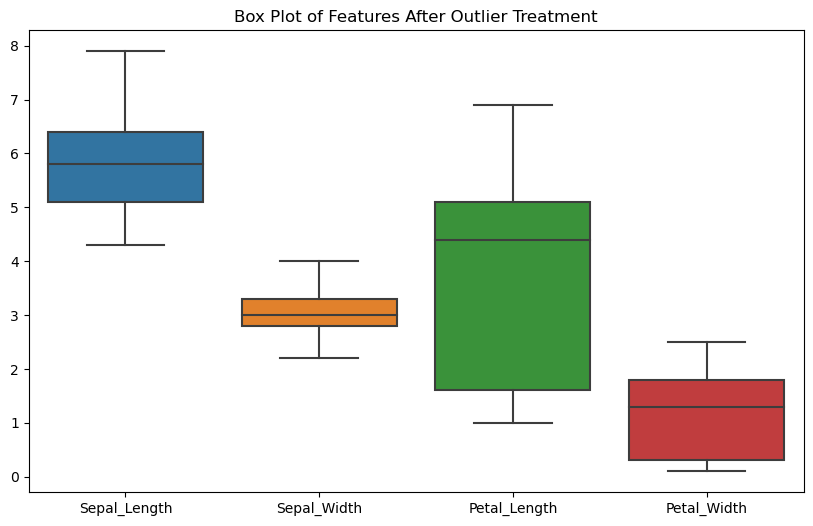

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned_no_outliers.drop('Class', axis=1))
plt.title('Box Plot of Features After Outlier Treatment')
plt.show()

In [11]:
# Features and target variable
X = data_cleaned_no_outliers.drop('Class', axis=1)
y = data_cleaned_no_outliers['Class']

### Split data into 70% for training and 30% for testing

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Initialize the model

In [13]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

### Train the model

In [14]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Get feature importance

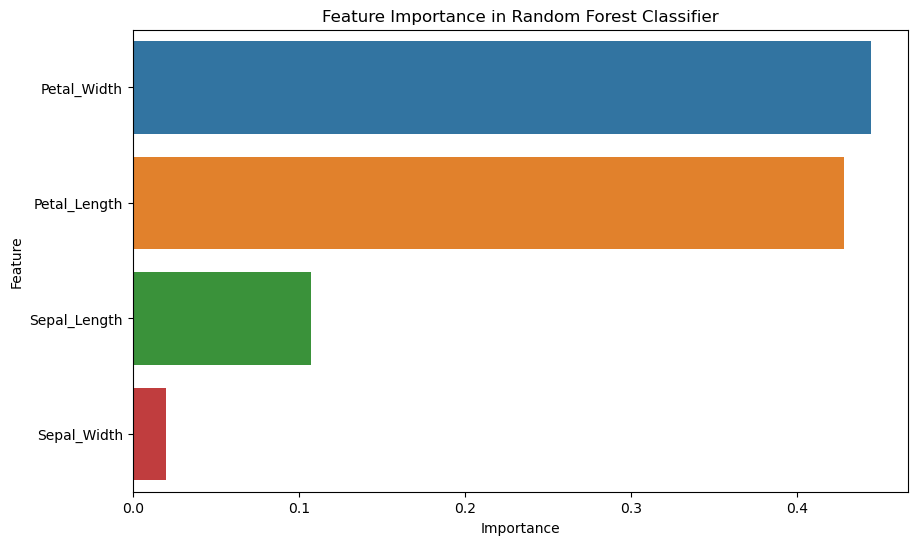

In [15]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [16]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9069767441860465
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.80      0.92      0.86        13
           2       0.93      0.81      0.87        16

    accuracy                           0.91        43
   macro avg       0.91      0.91      0.91        43
weighted avg       0.91      0.91      0.91        43



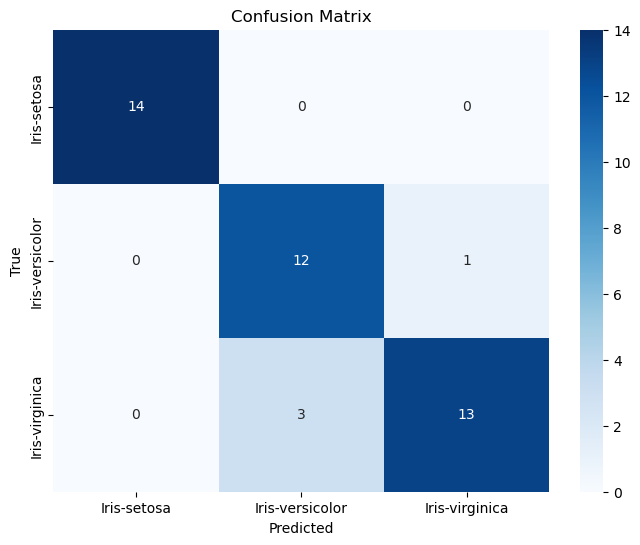

In [17]:
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()